# ASSIGNMENT 2 - Practical Data Science with Python
### Name : HILL JIGISHKUMAR MODI
### ID : S3827516

# Task 1: Retrieving and Preparing the Data ##

# Data Retrieving ###

## Importing Libraries ####

In [1]:
#installing altair for graph
#installing gini for Random Forest Classification

#import libraries 
#pandas for data retieval and other basic functions
#matplotlib.pyplot as plt for generating graphs and charts
#numpy for dealing with null values
#seaborn for generating normal distribution and histograms of attributes
#altair for developing and generating layered design visuliazation graph
#statistics for statistic functions

#importing metrics, preprocessing from sklearn
#importing train_test_split for spliting the dataset, stratifiedkfold, GridSearchCV for classification from sklearn.model_selection
#importing Pipeline for pipeline functions from sklearn.pipeline
#importing SelectKBest, chi2, mutual_info_regression, f_regression for pipeline functions and parameters from sklearn.feature
#importing KNeighborsClassifier for KNN classification from sklearn.neighbors
#importing RandomForestClassifier for RF classification from sklearn.ensemble
#importing ttest_ind - t-test of independent data from scripy.stats for two sided p value


# !pip install --upgrade altair
# !pip install gini==0.7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import statistics

from scipy import stats
from scipy.stats import ttest_ind
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing Dataset

In [2]:
#Data Retriving

#import data_set Data_Cortex_Nuclear.csv as mice_protien_Expression_csv
#read the file as mice_protein_Expression

with open('Data_Cortex_Nuclear.csv') as mice_protien_Expression_csv:
    mice_protein_Expression = pd.read_csv(mice_protien_Expression_csv, sep=',',decimal='.')

In [3]:
#displaying every columns, every rows 

pd.set_option('display.max_columns', None)
mice_protein_Expression.head(None)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

## Size of Dataset

In [4]:
#displaying size of dataset mice_protein_Expression

mice_protein_Expression.shape

(1080, 82)

# Data Preparing

## Cheking Data Types ##

In [5]:
#Cheking Data Types

#with use of dtypes
#every mice_protein_expression columns have float64 data type,
#while, every columns representing attributes of protein have object datatype, also MouseID have object as Data Type

mice_protein_Expression.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

## Typo - Whitespace,  Sanity Check

 
    Here, as all the values are in the numeric form, no need to check for any typo or whitrspace error.
    From the dataset, even any type of Sanity error is also hard to occur.
    
    So, I will directly check for Null Values.

## Dealing with Null Values ##

In [6]:
#Cheking for null values in database

mice_protein_Expression.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

 
    • There are many null values, so simply remove all tuples with null values will make our dataset too shrink.
    
    • On other hand, if we ignore, all the values, then it will reduce it's trustworthiness.
    
    • Ergo, I have decided to Replace all the null values with median.

In [7]:
#replacing every null values with median()
#then again cheking for null values, to be sure null values have been replaced with median

mice_protein_Expression = mice_protein_Expression.fillna(mice_protein_Expression.median())

mice_protein_Expression.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

## Encode Target Columns
    Here, we don’t need following columns in Data Modeling Techniques and Classification.
    •	MouseID - As it only represents ID of each mouse, which had been tested for Protien Expression Experiment
    •	Genotype - As it represents Genotype of each mouse,
            Control (c)
            trisomy (t)
    •   Treatment - As it represents Treatment of each mouse,
            memantine (m)
            saline (s)
    •	Behavior - As it represents Behavior of each mouse,
            context-shock (CS)
            shock-context (SC)
    
            •  Thess are just the Characteristics of Class Attribute. Class Attribute itsekf stores all these values.
            •  Here, in this Dataset, Class Attribute is our Target Value. Ergo, I will simply remove these attributes from the daraset.

In [8]:
#Removing Extra Columns

protein_columns = mice_protein_Expression.drop(columns=['MouseID','Genotype','Treatment','Behavior'])

 
    • Assigning continuous values to every type of Protein Class Values, which is in categorical form. So, we can pass the values into our model 

In [9]:
#Replacing each value of Class Attribute with Numerical Value

protein_columns = protein_columns.apply(lambda t: t.astype(str)
                .replace({
                    'c-CS-s': 1,
                    'c-CS-m': 2,
                    'c-SC-s': 3,
                    'c-SC-m': 4,
                    't-CS-s': 5,
                    't-CS-m': 6,
                    't-SC-s': 7,
                    't-SC-m': 8
                    })
                if t.dtype == "object" 
                else t
               )

 
    • As discussed, I am creating data frame target_columns with only one target column - Class

In [10]:
#Creating Target Columns Dataframe

target_columns = pd.DataFrame(data = protein_columns.loc[:, 'class'])
target_columns.head(None)

,class
0,2
1,2
2,2
3,2
4,2
...,...
1075,7
1076,7
1077,7
1078,7


 
    • As discussed, I am creating data frame protein_columns with only every columns except 'Class' column
    
    • Dataframe presents every proteign behaviour of every mouse.

In [11]:
#Creating Protien Columns Dataframe

protein_columns = protein_columns.drop(columns='class')
protein_columns.head(None)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.129468,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.129468,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.129468,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.129468,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.129468

## Scalling the Data Frame

    • To pass the data to the data modelind techniques, the data must be in between 0 to 1, so I am converting dataframe in the range(0 - 1), with the help of QuantileTransformer() scalling technique. 

In [12]:
#converting protein_columns dataframe in the range of (0 -1), with QuantileTransformer()

protein_columns_copy = protein_columns.copy() 

protein_columns_scaler = preprocessing.QuantileTransformer()
protein_columns_scaler.fit(protein_columns)
protein_columns = protein_columns_scaler.fit_transform(protein_columns)

protein_columns = pd.DataFrame(protein_columns, columns = protein_columns_copy.columns)
protein_columns.head(None)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.765632,0.816411,0.975955,0.926896,0.985026,0.376134,0.423830,0.225196,0.722110,0.888790,0.777190,0.382647,0.925863,0.691200,0.946767,0.275247,0.879519,0.919313,0.510664,0.912908,0.754414,0.591590,0.484715,0.960017,0.955010,0.960846,0.764598,0.879546,0.851726,0.481464,0.802302,0.965605,0.437648,0.537531,0.183030,0.704384,0.502374,0.881179,0.621070,0.756803,0.712463,0.841560,0.260281,0.559256,0.289776,0.937906,0.352125,0.513481,0.384554,0.714463,0.546852,0.449470,0.695568,0.158023,0.207038,0.413387,0.010266,0.309664,0.607520,0.766674,0.121612,0.066557,0.623788,0.177150,0.001175,0.143330,0.408816,0.062078,0.059835,0.5,0.158023,0.141112,0.383338,0.114799,0.036172,0.020557,0.834340
1,0.784318,0.742692,0.958052,0.920041,0.962164,0.301249,0.351219,0.189430,0.672698,0.784559,0.785798,0.342299,0.885968,0.540420,0.872085,0.244632,0.724742,0.809208,0.532387,0.880625,0.725705,0.458122,0.404164,0.931381,0.919974,0.943014,0.658782,0.787754,0.769264,0.353369,0.698542,0.948957,0.352228,0.314305,0.154129,0.506255,0.324345,0.817436,0.399551,0.628909,0.626626,0.741558,0.244916,0.556411,0.301885,0.949266,0.349370,0.504092,0.384074,0.685375,0.552455,0.424434,0.584549,0.166017,0.336512,0.432370,0.024097,0.413366,0.691525,0.753499,0.189977,0.130490,0.697747,0.168104,0.004226,0.100100,0.496993,0.179129,0.027510,0.5,0.166017,0.078944,0.462471,0.092809,0.045969,0.028539,0.888522
2,0.774787,0.795570,0.967229,0.869457,0.960162,0.277232,0.392287,0.184202,0.704739,0.750670,0.763624,0.293533,0.873061,0.547918,0.926648,0.269493,0.736773,0.799745,0.683209,0.856425,0.724741,0.577571,0.409565,0.933294,0.936938,0.935921,0.707494,0.839400,0.786021,0.404498,0.645109,0.949970,0.359430,0.325309,0.154204,0.485719,0.312992,0.760405,0.443888,0.601486,0.562562,0.713607,0.217359,0.591093,0.316027,0.973998,0.398422,0.617362,0.468284,0.670806,0.597827,0.241646,0.729593,0.194556,0.216911,0.404822,0.022034,0.394250,0.737005,0.761771,0.419266,0.111116,0.685759,0.181239,0.001001,0.085098,0.482668,0.098254,0.037531,0.5,0.194556,0.109042,0.431758,0.092005,0.040627,0.017988,0.967354
3,0.689464,0.620369,0.802263,0.684652,0.877867,0.414321,0.404404,0.136173,0.455800,0.781257,0.676579,0.327531,0.855644,0.827522,0.670519,0.141871,0.507516,0.851806,0.738519,0.651614,0.691575,0.536610,0.492892,0.728603,0.792198,0.875321,0.705866,0.557871,0.608270,0.423503,0.567512,0.795699,0.362405,0.369376,0.166746,0.448404,0.334164,0.687654,0.414180,0.619704,0.657814,0.689534,0.563534,0.277889,0.142763,0.891624,0.460759,0.541272,0.146162,0.580568,0.522780,0.583763,0.603429,0.102057,0.128690,0.220637,0.008715,0.386785,0.667669,0.792857,0.123124,0.085121,0.424447,0.121341,0.028165,0.076924,0.419454,0.084100,0.161371,0.5,0.102057,0.194343,0.213117,0.237306,0.134852,0.079594,0.859922
4,0.673942,0.621651,0.803156,0.567560,0.825816,0.317618,0.365423,0.129720,0.261282,0.692729,0.646653,0.274591,0.802727,0.508842,0.635804,0.127604,0.380068,0.794555,0.757441,0.526856,0.628254,0.450394,0.422001,0.755489,0.765964,0.818333,0.579789,0.505826,0.488402,0.321329,0.478764,0.769219,0.303168,0.241748,0.115729,0.283151,0.274307,0.516278,0.242384,0.527507,0.557574,0.570630,0.549589,0.259781,0.156631,0.897412,0.482701,0.544565,0.225157,0.595667,0.532644,0.480833,0.674675,0.126097,0.146351,0.270297,0.030343,0.337491,0.812669,0.741457,0.277326,0.088077,0.521664,0.172416,0.026945,0.087139,0.625549,0.238194,0.130748,0.5,0.126097,0.185607,0.4220

# Task 2 : Data Exploration

#  Exploration each column

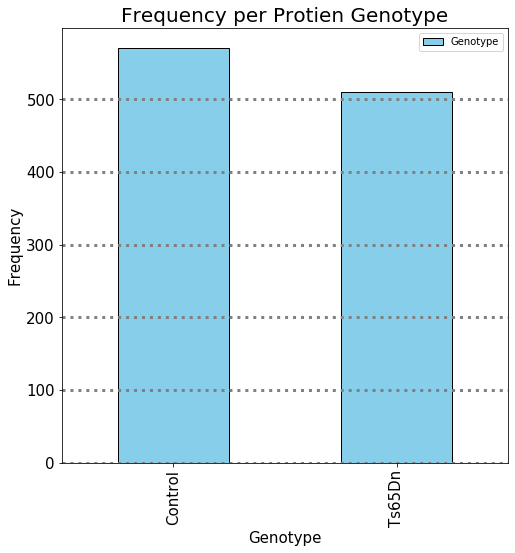

In [13]:
#Creating bar plot of Genotype Attribute with help of plt to determine frequency of each value

mice_protein_Expression['Genotype'].value_counts().plot(kind = 'bar', 
                                                     edgecolor = 'black', 
                                                     figsize = (8,8),
                                                     color = 'skyblue',
                                                     fontsize = 15,
                                                     legend = 'true', 
                                                     )
plt.title('Frequency per Protien Genotype', 
          fontsize = 20)
plt.xlabel('Genotype', 
           fontsize = 15)
plt.ylabel("Frequency",
           fontsize = 15)
plt.grid(color = 'grey', 
         linewidth = 3, 
         linestyle = 'dotted', 
         axis = 'y')

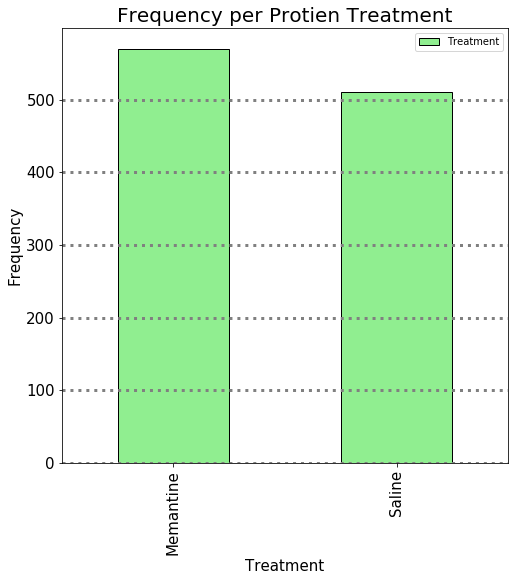

In [14]:
#Creating bar plot of Treatment Attribute with help of plt to determine frequency of each value

mice_protein_Expression['Treatment'].value_counts().plot(kind = 'bar', 
                                                     edgecolor = 'black', 
                                                     figsize = (8,8),
                                                     color = 'lightgreen',
                                                     fontsize = 15,
                                                     legend = 'true', 
                                                     )
plt.title('Frequency per Protien Treatment', 
          fontsize = 20)
plt.xlabel('Treatment', 
           fontsize = 15)
plt.ylabel("Frequency",
           fontsize = 15)
plt.grid(color = 'grey', 
         linewidth = 3, 
         linestyle = 'dotted', 
         axis = 'y')

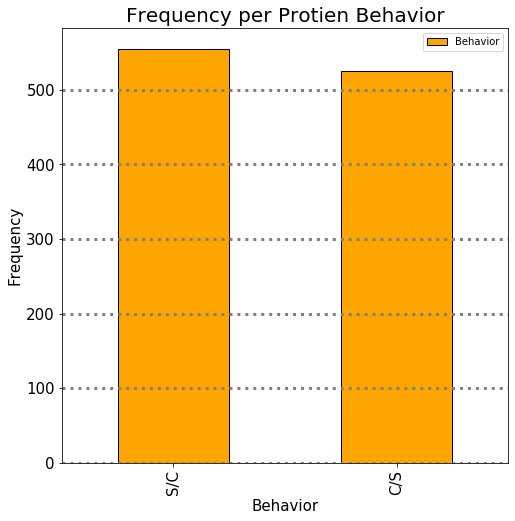

In [15]:
#Creating bar plot of Behavior Attribute with help of plt to determine frequency of each value

mice_protein_Expression['Behavior'].value_counts().plot(kind = 'bar', 
                                                     edgecolor = 'black', 
                                                     figsize = (8,8),
                                                     color = 'orange',
                                                     fontsize = 15,
                                                     legend = 'true', 
                                                     )
plt.title('Frequency per Protien Behavior', 
          fontsize = 20)
plt.xlabel('Behavior', 
           fontsize = 15)
plt.ylabel("Frequency",
           fontsize = 15)
plt.grid(color='grey', 
         linewidth=3, 
         linestyle='dotted', 
         axis='y')

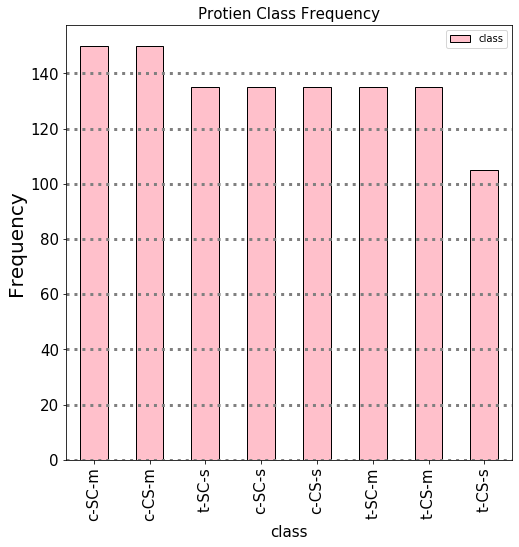

In [16]:
#Creating bar plot of Class Attribute with help of plt to determine frequency of each value

mice_protein_Expression['class'].value_counts().plot(kind='bar', 
                                                     edgecolor='black', 
                                                     figsize=(8,8),
                                                     color = 'pink',
                                                     fontsize=15,
                                                     legend = 'true', 
                                                     )
plt.title('Protien Class Frequency', 
          fontsize=15)
plt.xlabel('class', 
           fontsize=15)
plt.ylabel("Frequency",
           fontsize=20)
plt.grid(color='grey', 
         linewidth=3, 
         linestyle='dotted', 
         axis='y')

Text(0.5, 1.0, 'Histogram of SOD1_N Protein')

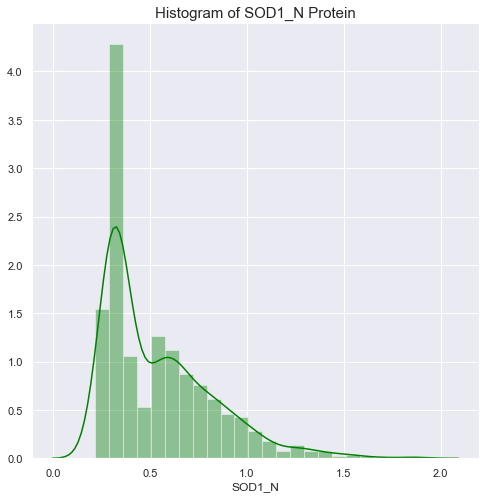

In [17]:
#Creating Histogram and normal Distribution Curve for 'SOD1_N' Protein Expression on mice, with help of sns  

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(mice_protein_Expression['SOD1_N'],
            color = 'green',
            norm_hist='true',
            label = 'SOD1_N');
plt.title("Histogram of SOD1_N Protein", 
          fontsize=15)

Text(0.5, 1.0, 'Histogram of pCAMKII_N Protein')

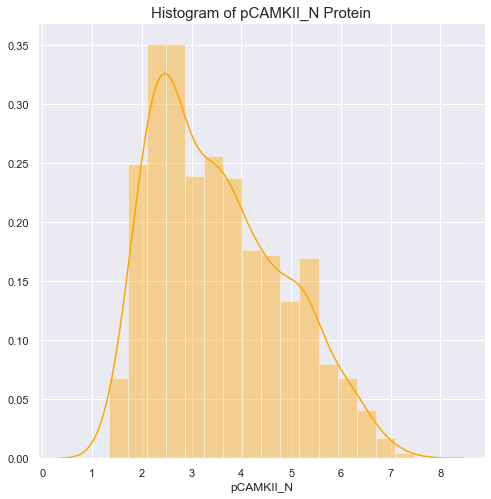

In [18]:
#Creating Histogram and normal Distribution Curve for 'pCAMKII_N' Protein Expression on mice, with help of sns

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(mice_protein_Expression['pCAMKII_N'],
            color = 'orange',
            norm_hist='true',
            label = 'pCAMKII_N');
plt.title("Histogram of pCAMKII_N Protein",
          fontsize=15)

Text(0.5, 1.0, 'Histogram of Tau_N Protein')

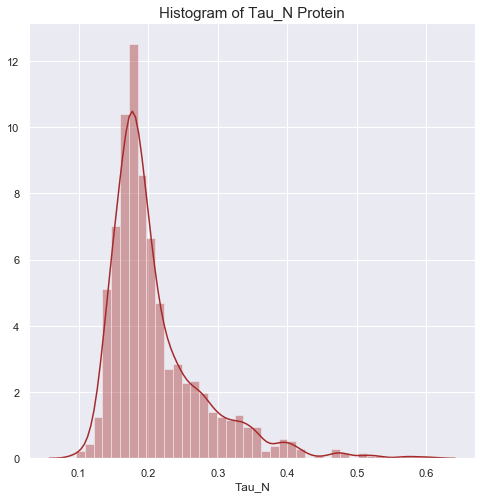

In [19]:
#Creating Histogram and normal Distribution Curve for 'Tau_N' Protein Expression on mice, with help of sns

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(mice_protein_Expression['Tau_N'],
            color = 'brown',
            norm_hist='true',
            label = 'Tau_N');
plt.title("Histogram of Tau_N Protein",
          fontsize=15)

Text(0.5, 1.0, 'Histogram of pP70S6_N Protein')

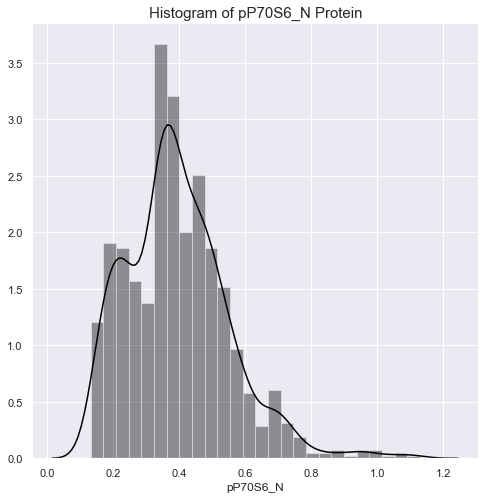

In [20]:
#Creating Histogram and normal Distribution Curve for 'pP70S6_N' Protein Expression on mice, with help of sns

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(mice_protein_Expression['pP70S6_N'],
            color = 'black',
            norm_hist='true',
            label = 'pP70S6_N');
plt.title("Histogram of pP70S6_N Protein",
          fontsize=15)

Text(0.5, 1.0, 'Histogram of pPKCG_N Protein')

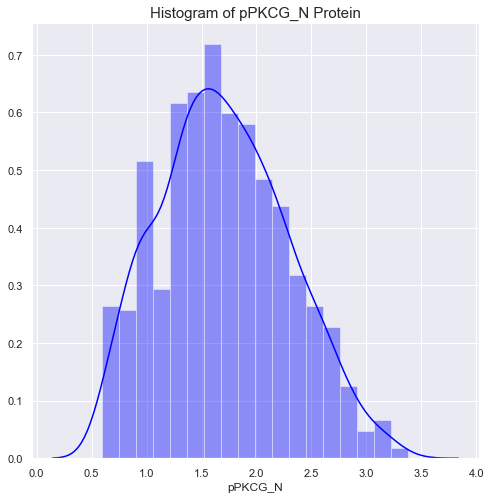

In [21]:
#Creating Histogram and normal Distribution Curve for 'pPKCG_N' Protein Expression on mice, with help of sns

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(mice_protein_Expression['pPKCG_N'],
            color = 'blue',
            norm_hist='true',
            label = 'pPKCG_N');
plt.title("Histogram of pPKCG_N Protein",
          fontsize=15)

Text(0.5, 1.0, 'Histogram of AKT_N Protein')

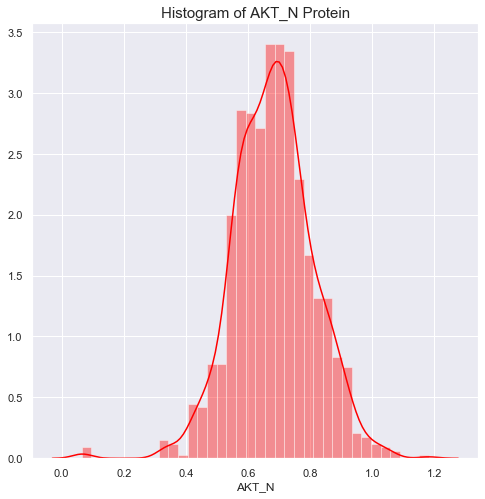

In [22]:
#Creating Histogram and normal Distribution Curve for 'AKT_N' Protein Expression on mice, with help of sns

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(mice_protein_Expression['AKT_N'],
            color = 'Red',
            norm_hist='true',
            label = 'AKT_N');
plt.title("Histogram of AKT_N Protein",
          fontsize=15)


# Exploring the relationship between pairs of attributes

## Recognizing Columns for Relationship

     • I have select first 10 columns to explore the relationship between them.

In [23]:
#generating relationship variable from 'DYRK1A_N':'pELK_N' protein_columns to show relationship

realationship = protein_columns.loc[ :, 'DYRK1A_N':'pELK_N']
realationship

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N
0,0.765632,0.816411,0.975955,0.926896,0.985026,0.376134,0.423830,0.225196,0.722110,0.888790
1,0.784318,0.742692,0.958052,0.920041,0.962164,0.301249,0.351219,0.189430,0.672698,0.784559
2,0.774787,0.795570,0.967229,0.869457,0.960162,0.277232,0.392287,0.184202,0.704739,0.750670
3,0.689464,0.620369,0.802263,0.684652,0.877867,0.414321,0.404404,0.136173,0.455800,0.781257
4,0.673942,0.621651,0.803156,0.567560,0.825816,0.317618,0.365423,0.129720,0.261282,0.692729
...,...,...,...,...,...,...,...,...,...,...
1075,0.124130,0.220513,0.091024,0.284672,0.072108,0.304552,0.329703,0.253133,0.459767,0.112808
1076,0.183691,0.252534,0.080854,0.356025,0.123734,0.703686,0.503099,0.261471,0.563160,0.122190
1077,0.059445,0.086103,0.028938,0.051047,0.023042,0.394738,0.219479,0.086106,0.197788,0.034623
1078,0.047131,0.123393,0.052453,0.106814,0.036096,0.275695,0.365353,0.112119,0.259670,0.057910


##  Two Sided Null Hypotheses Test

    • H0 : mean difference of expression of every protein in relationship to { c_CS_s, c_SC_s } type of mouse is zero.
        μ1 = μ2
            μ1 = c_CS_s type of mice
            μ2 =  c_SC_s type of mice
            
    • HA : mean difference of expression of every protein in relationship to { c_CS_s, c_SC_s } type of mouse is not zero.
        μ1 ≠ μ2
        
        
    • if p - value is < 0.005,
        we reject null hypotheses (H0) - there is statistically significant evidence of mean difference in the respected proteirn expression value of mice of both types.
    
    • otherwise,
       we fail to reject null hypotheses (HA) - we fail to find statistically significant evidence to find mean difference in the respected protein expression value of mice of both types.

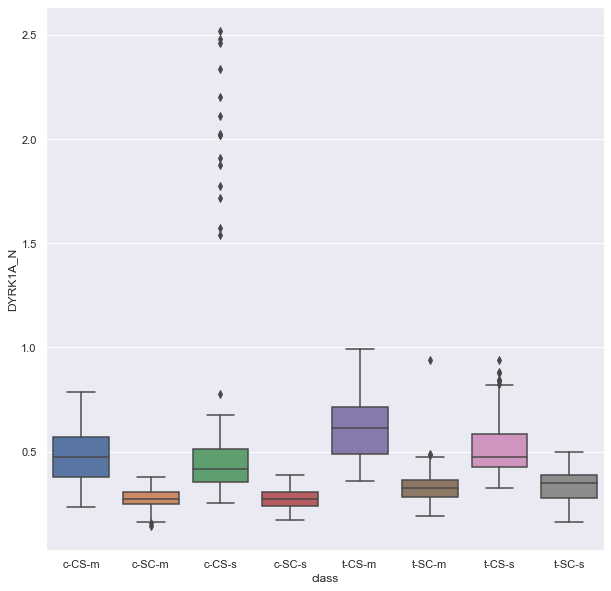

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 1.623342284358386e-11
we reject null hypothesis


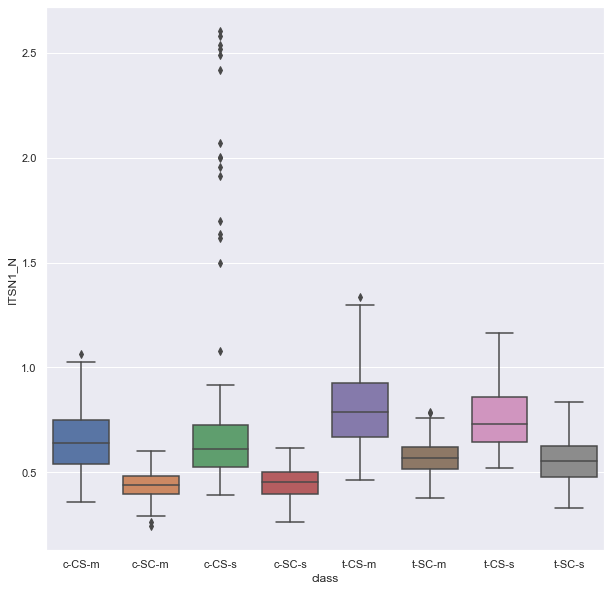

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 2.0181298785621345e-12
we reject null hypothesis


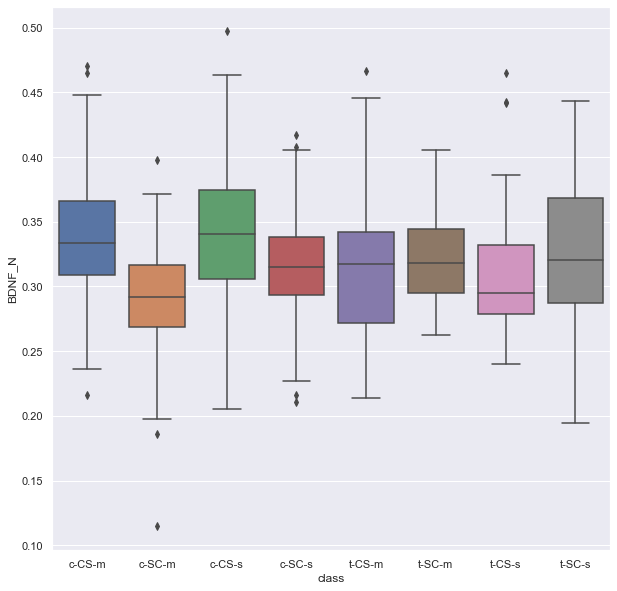

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 2.730716645883316e-06
we reject null hypothesis


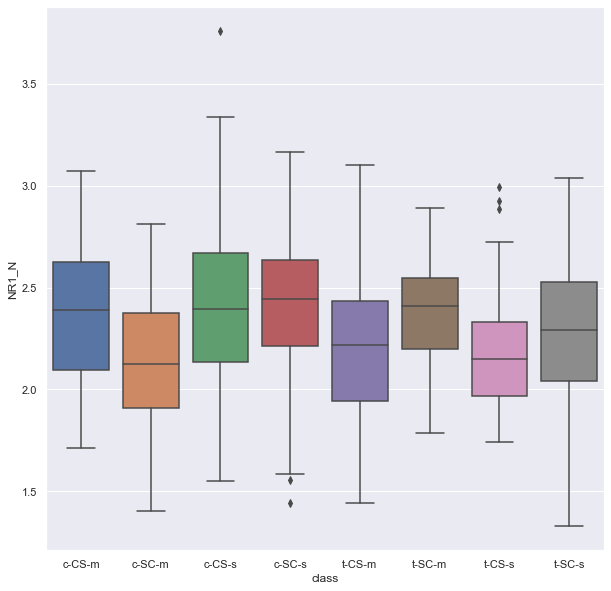

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 0.7704214118033254
we fail to reject null hypothesis


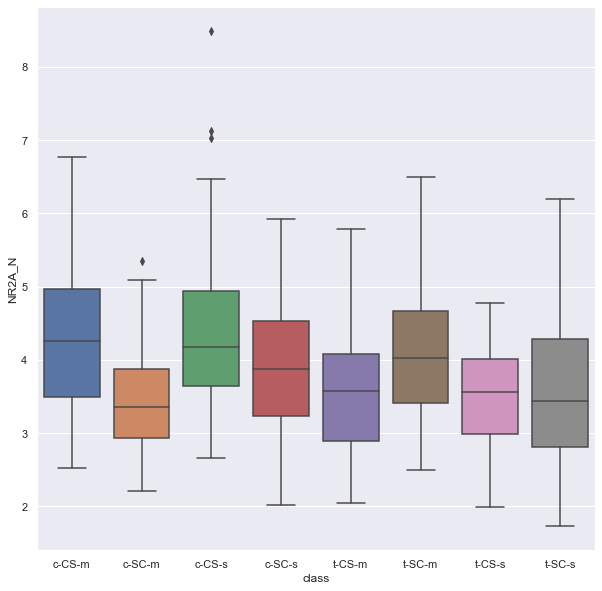

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 0.0014925620413027269
we reject null hypothesis


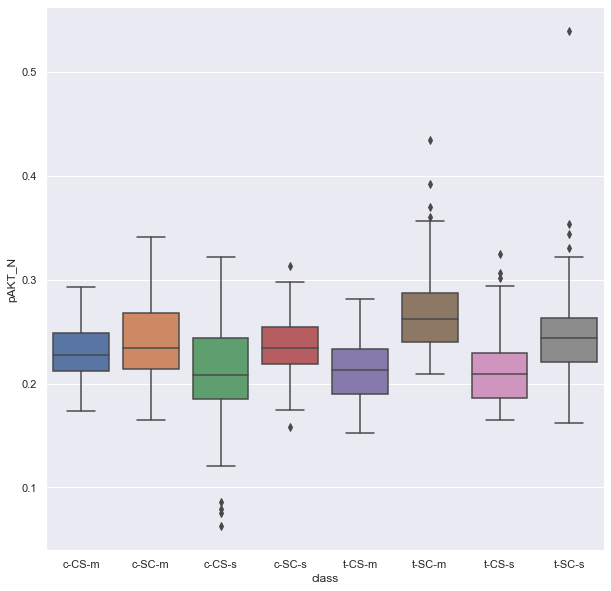

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 8.850134916093836e-05
we reject null hypothesis


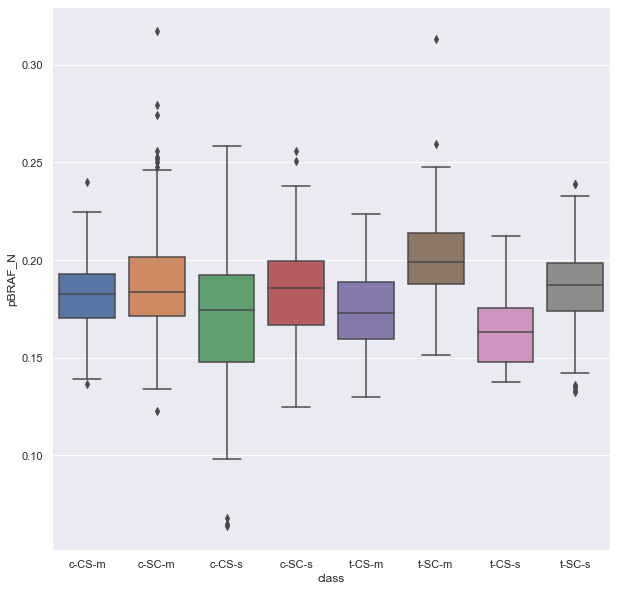

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 3.3653421573227345e-06
we reject null hypothesis


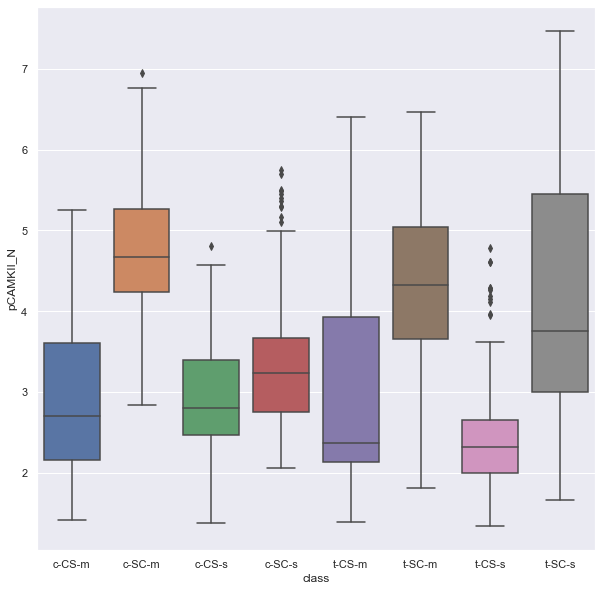

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 1.383756020392782e-05
we reject null hypothesis


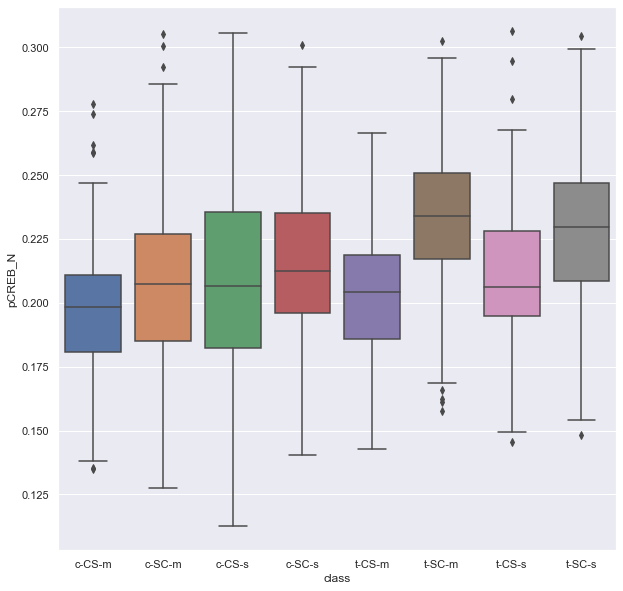

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 0.11890734929460148
we fail to reject null hypothesis


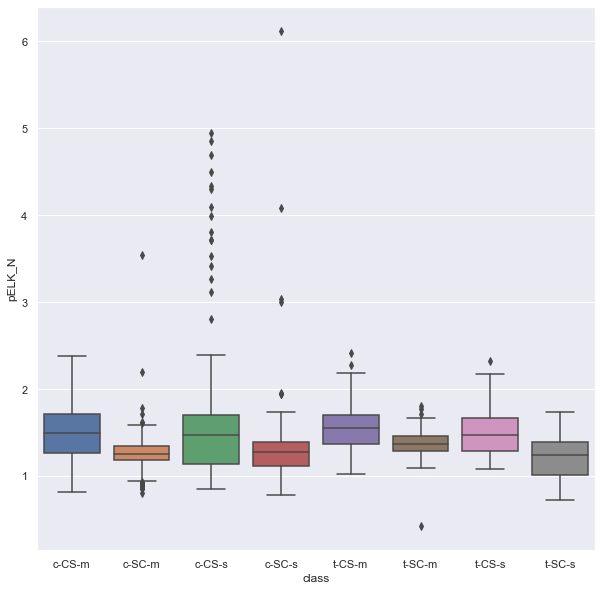

Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' 
p-value 0.0001280569684833767
we reject null hypothesis


In [24]:
#creating boxplot for every class type with protein columns of relationship

for columns in realationship:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = mice_protein_Expression, 
                x = 'class', 
                y = columns)
    plt.show()
    
    c_cs_s = mice_protein_Expression.loc[mice_protein_Expression['class'] == 'c-CS-s'][columns]
    c_sc_s = mice_protein_Expression.loc[mice_protein_Expression['class'] == 'c-SC-s'][columns]
    
    print("Null Hypothesis Test for Two-sided p value of two class - 'c_CS_s', 'c_SC_s' ")
    
# two sided t-test of two independent samples     
    ttest, pval = ttest_ind(c_cs_s, c_sc_s)
    print("p-value",pval)

    if pval < 0.05:
      print("we reject null hypothesis")
    else:
      print("we fail to reject null hypothesis")

### DYRK1A_N
     • From the boxplot, we can conclude that, down syndrome mice injected with memantine, and Context-Shock has highest median value and highest boundries, while 'c-SC-m' and 'c-CS-s' has lowest and identical level of median.
     • Control mice injected with saline of SC have huge amount of outliers.
     • t-CS-m with high count of DYRK1A_N, have down syndrome, and injected with memantine, have possiblity that they learnt. 
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 1.6233422843584153e-11 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the DYRK1A_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for DYRK1A_N.    

### ITSN1_N	
     • From the boxplot, we can conclude that, down syndrome mice injected with memantine, and Context-Shock has highest median value and highest boundries, means if ITSN1_N counts are higeher, down syndrome with memantine might be learnt. while 'c-SC-m' and 'c-CS-s' has lowest and almost identical level of median.
     • Control mice injected with saline of SC have huge amount of outliers.
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 2.0181298785621345e-12 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the ITSN1_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for ITSN1_N. 

### BDNF_N	
     • From the boxplot, we can conclude that, Controlled mice injected with saline, and Context-Shock has highest median value and highest boundries, means - controlled mice with highest count of BDNF_N and injected with saline, they mimght learnt.
     • while  down syndrome mice injected with memantine have almost simmilar level of median. 
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 2.730716645883316e-06 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the BDNF_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for BDNF_N.  

### NR1_N	
     • From the boxplot, we can conclude that, Controlled mice injected with saline irrespected of behavior, have almost identical medians, and have highest count, while controlled mice injected with memantine with SC behavoius has lowest.
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 0.7704214118033254 > 0.005
         • we fail to reject null hypotheses - there is no statistically significant evidence of mean difference in the NR1_N proteirn expression value of mice of both types. Ergo, will support the alternate hypotheses. Both types of mice will act same when they have similar counts for NR1_N.
         
### NR2A_N	
    • From the boxplot, we can conclude that, Controlled mice with CS behaviour has highest counts and medians, while c-SC-m have lowest.
    
    • Two -sided p value for independent samples of two types of mice,
         • p -value = 0.001492562041302726 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the NR2A_N	 proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for NR2A_N.

### pAKT_N	
     • From the boxplot, we can conclude that, down syndrome mice injected with memantine, and Shock-Context has highest median value and highest boundries, means - if pAKT_N counts are higher, in trisomy mice injected with memantine, will fail to learn.
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 8.850134916094043e-05 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the pAKT_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for pAKT_N.
         
### pBRAF_N	
     • From the boxplot, we can conclude that, down syndrome mice injected with memantine, and Shock-Context has highest median value and highest boundries, means - if pBRAF_N counts are higher, in trisomy mice injected with memantine, will fail to learn.
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 3.3653421573227345e-06 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the pBRAF_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for pBRAF_N.
         
### pCAMKII_N
     • From the boxplot, we can conclude that, control mice injected with memantine, and Shock-Context has highest median value, means - if pCAMKII_N counts are higher, in trisomy mice injected with memantine, will fail to learn.
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 1.3837560203928129e-05 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the pCAMKII_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for pCAMKII_N.

### pCREB_N	
     • From the boxplot, we can conclude that, down syndrome mice injected with memantine, and Shock-Context has highest median value and highest boundries, means - if pCREB_N counts are higher, in trisomy mice injected with memantine, will fail to learn.
     
     • Two -sided p value for independent samples of two types of mice,
         • p -value = 0.11890734929460155 > 0.005
         •  we fail to reject null hypotheses - there is no statistically significant evidence of mean difference in the pCREB_N proteirn expression value of mice of both types. Ergo, will support the alternate hypotheses. Both types of mice will act same when they have similar counts for pCREB_N.

### pELK_N
    • From the boxplot, we can conclude that, down syndrome mice injected with memantine, and Context-Shock has highest median value and highest boundries, means - if pELK_N counts are higher, in trisomy mice injected with memantine, will learn.
    
    • Two -sided p value for independent samples of two types of mice,
         • p -value = 1.3837560203928129e-05 < 0.005
         • we reject null hypotheses - there is statistically significant evidence of mean difference in the pELK_N proteirn expression value of mice of both types. Both types of mice will act differently, when they have same counts for pELK_N.

# Data Modelling

## Train-Test Splitting

    • The data frames will be split for training and testing
    • with the ratio of (0.65,0.35)
    • Mean - We will train total 65% of data, and will use them to predict the 35% of target data 

In [25]:
#Splitting the data set for Training and Testing
#On the ratio of (0.65, 0.35)

Protein_train, Protein_test, Protein_target_train, Protein_target_test = train_test_split(protein_columns, 
                                                                                          target_columns, 
                                                                                          test_size = 0.35, 
                                                                                          random_state = 100,
                                                                                          stratify = target_columns)

print(Protein_train.shape)
print(Protein_test.shape)

(702, 77)
(378, 77)


## Get Search Result Function

    ger_search_results(gs) function will return Series of best parameters and scores for model with pipeline.

In [26]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
                  'std_score': np.std(scores),
                  'min_score': np.min(scores),
                  'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

## Model Evaluation Technique

    • For every model, I have used 8 splits Cross Validation evaluation Function for Hyper-Parameters Tuning.
    • Model will iterate 8 times.

In [27]:
#function defination for modelling : 8 splits cross-validation technique with help of StratifiedKFold

function = StratifiedKFold(n_splits = 8)

## Hyper-Parameters Tuning

    • Hyper Parameters are the parameters that are not by default and can be passed to the construction of estimators.
    
    • It is good practice to search for the best score for the cross-validation score, I will used SelectKbest() for that.
    
    • Here, SelectKBest() will score the features with help of functions described in Parameters of Pipeline.
        • For KNN,
            I have used chi2 function.
        • For RF,
            I have used [mutual_info_regression, f_regression] Functions.
            
    • After that, SelectKbest() will delete everything besides K with highest value.

## Estimators and Parameters of Pipeline of each Classification

    • I have used SelectKBest() as estimator with pipeline in both models.
    • While, talking about parameters.
        • For KNN Classification
            • I have used [chi2] as 'score_func' in parameters of Hyper - Tune SelectKBest() with pipeline.
            • Added k[1,15,20,25] in Parameter. 
        
        • For RF Classification 
            • I have used [mutual_info_regression, f_regression] as 'score_func' in parameters of Hyper - Tune SelectKBest() with pipeline.
            • Added k[1, 3, 15, 20 ] in Parameter.

## K-Nearest Neighbors Classifier (KNN)

   • The KNN Classification is the most easitest and simplest classification technique introduced in the model Classification Technique.
    
    • It is neighbors-based classification technique, in which it stores instances of training data.
    
    • Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
    
    • The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.
    • KNN is comprised of Following Parameters.
        • n_neighbors - it represents number of neighbors to use.
                • I have used - [1, 3, 4]
        • weights - it represents weights of each neighborhood points.
                • I have used - ["distance"] - closer neighbors of point will have a greater influences than neighbor point, which are far away.
        • metric - by default Minkowski metric - It is distance metric
        • p - represents power parameter for Minkowski metric.

In [28]:
#Running the KNN classification on the training-testing dataset

pipeline_KNN = Pipeline(steps = [
                                ('skb', SelectKBest()), 
                                ('knn', KNeighborsClassifier())
                        ])

pipeline_parameters_KNN = {
                            'skb__k':[1, 15, 20, 25],
                            'skb__score_func':[chi2],
                            'knn__n_neighbors': [1, 3, 4],
                            'knn__weights': ["distance"],
                            'knn__p': [1, 2, 3]
                          }

classification_KNN = GridSearchCV( estimator = pipeline_KNN, 
                                   param_grid = pipeline_parameters_KNN, 
                                   cv=function,
                                   refit=True,
                                   n_jobs=-1,
                                   scoring='accuracy',
                                   verbose=1
                                  )

classification_KNN.fit(Protein_train, Protein_target_train);

Fitting 8 folds for each of 36 candidates, totalling 288 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
#dislpaying best parameters tO choose for KNN classification

classification_KNN.best_params_

{'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'distance',
 'skb__k': 25,
 'skb__score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

In [30]:
#Showing the best score of KNN Classification with round answer to 5 decimal points

round(classification_KNN.best_score_,5)

0.98718

In [31]:
#displaying each score of KNN classification (36 Candidates with 1 Fold)

final_classification_KNN = get_search_results(classification_KNN)
final_classification_KNN.head(None)

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,knn__weights,skb__k,skb__score_func
7,0.987183,0.01053,1.0,0.965909,1,2,distance,25,<function chi2 at 0x0000014FC8DC08B8>
11,0.981469,0.009767,1.0,0.965909,1,3,distance,25,<function chi2 at 0x0000014FC8DC08B8>
3,0.980016,0.017904,1.0,0.942529,1,1,distance,25,<function chi2 at 0x0000014FC8DC08B8>
6,0.977207,0.015033,1.0,0.954545,1,2,distance,20,<function chi2 at 0x0000014FC8DC08B8>
2,0.975754,0.015583,1.0,0.954023,1,1,distance,20,<function chi2 at 0x0000014FC8DC08B8>
5,0.975754,0.008981,0.988636,0.965517,1,2,distance,15,<function chi2 at 0x0000014FC8DC08B8>
1,0.97293,0.007936,0.977273,0.954545,1,1,distance,15,<function chi2 at 0x0000014FC8DC08B8>
10,0.971444,0.017248,1.0,0.942529,1,3,distance,20,<function chi2 at 0x0000014FC8DC08B8>
31,0.970072,0.011346,0.988636,0.954023,4,2,distance,25,<function chi2 at 0x0000014FC8DC08B8>
27,0.970024,0.025586,1.0,0.91954,4,1,distance,25,<function chi2 at 0x0000014FC8DC08B8>


In [32]:
#displaying the accuracy in the predicting of values of Protein_test and Protein_target_test Columns of KNN Classification

round(classification_KNN.score(Protein_test, Protein_target_test),5)

0.98942

In [33]:
#Generating KNN Classification Feature with best value of 'k' = 25, and droping 'score_func'

classification_KNN_Features = final_classification_KNN[final_classification_KNN['skb__k'] == 25].drop(columns='skb__score_func')

In [34]:
#Showing records of KNN Classifiaction Features

classification_KNN_Features

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,knn__weights,skb__k
7,0.987183,0.01053,1.0,0.965909,1,2,distance,25
11,0.981469,0.009767,1.0,0.965909,1,3,distance,25
3,0.980016,0.017904,1.0,0.942529,1,1,distance,25
31,0.970072,0.011346,0.988636,0.954023,4,2,distance,25
27,0.970024,0.025586,1.0,0.91954,4,1,distance,25
19,0.968636,0.01957,1.0,0.942529,3,2,distance,25
15,0.968587,0.027379,1.0,0.908046,3,1,distance,25
23,0.964391,0.022335,0.988636,0.920455,3,3,distance,25
35,0.96297,0.021074,0.988636,0.931818,4,3,distance,25


In [35]:
#Generating KNN Classification Features graph

alt.Chart(
          classification_KNN_Features, 
          title = 'KNN Graph with 1 feature classification'
         ).mark_line(point = True).encode(
                                        alt.X('knn__n_neighbors', 
                                              title = 'N Neighbours wise split'),
                                        alt.Y('mean_score', 
                                              title ='Accuracy', 
                                              scale = alt.Scale(zero = False)
                                        )
)

alt.Chart(...)

## Random Forest Classification (RF)

    • A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
    
    • The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
    
    •  RF is comprised of Following Parameters.
        • n_estimators - it represents number of trees in the forest.
            • I have used - [80, 500] - 
        • max_features - features to consider when looking for the best split.
            • I have used - ["log2", "sqrt"]
               • "log2" - max_features = sqrt(n_features)
               • "sqrt" - max_features = sqrt(n_features)
        • criterion - it measures the quality of a split.
            • I have used - ["entropy", "gini"]
               • “gini” -  Gini impurity
               • “entropy” - information gain.
        • max_depth - it represents maximum depth of the tree.
            • by default - None
        • min_samples_split - it represents minimum number of samples required to split an internal node.
            • I have used - [2, 5].
            
        • And other by Default Parameter.    
                

In [36]:
#Running the  classification on the training-testing dataset

pipeline_RF = Pipeline(steps = [('skb', SelectKBest()), 
                                ('RM', RandomForestClassifier())
                               ])

pipeline_parameters_RF = {
                            'skb__k':[1, 3, 15, 20 ],
                            'skb__score_func':[mutual_info_regression,f_regression],
                            'RM__n_estimators': [50, 80, 100],
                            'RM__max_features': ["log2", "sqrt"],
                            'RM__criterion': ["entropy","gini"],
                            'RM__min_samples_split': [2, 5],
                         }

classification_RF = GridSearchCV( estimator = pipeline_RF, 
                                  param_grid = pipeline_parameters_RF, 
                                  cv = function,
                                  refit = True,
                                  n_jobs = -1,
                                  scoring = 'accuracy',
                                  verbose = 1
                                )

classification_RF.fit(Protein_train, Protein_target_train);

Fitting 8 folds for each of 192 candidates, totalling 1536 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [37]:
#dislpaying best parameters tO choose for RF classification

classification_RF.best_params_

{'RM__criterion': 'gini',
 'RM__max_features': 'sqrt',
 'RM__min_samples_split': 2,
 'RM__n_estimators': 80,
 'skb__k': 20,
 'skb__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_regression(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [38]:
#Showing the best score of RF Classification with round answer to 5 decimal points

round(classification_RF.best_score_,5)

0.97153

In [39]:
#displaying each score of RF classification (96 Candidates with 1 Fold)

final_classification_RF = get_search_results(classification_RF)
final_classification_RF.head(None)

,mean_score,std_score,max_score,min_score,RM__criterion,RM__max_features,RM__min_samples_split,RM__n_estimators,skb__k,skb__score_func
158,0.971526,0.01974,1.0,0.943182,gini,sqrt,2,80,20,<function mutual_info_regression at 0x0000014F...
63,0.970121,0.01498,1.0,0.943182,entropy,sqrt,2,80,20,<function f_regression at 0x0000014FC8DC0AF8>
22,0.970072,0.018018,0.988636,0.942529,entropy,log2,2,100,20,<function mutual_info_regression at 0x0000014F...
166,0.970072,0.016058,0.988636,0.943182,gini,sqrt,2,100,20,<function mutual_info_regression at 0x0000014F...
111,0.968685,0.017731,1.0,0.943182,gini,log2,2,80,20,<function f_regression at 0x0000014FC8DC0AF8>
...,...,...,...,...,...,...,...,...,...,...
185,0.179614,0.040367,0.229885,0.125,gini,sqrt,5,100,1,<function f_regression at 0x0000014FC8DC0AF8>
169,0.179581,0.038098,0.227273,0.125,gini,sqrt,5,50,1,<function f_regression at 0x0000014FC8DC0AF8>
177,0.175353,0.047495,0.241379,0.113636,gini,sqrt,5,80,1,<function f_regression at 0x0000014FC8DC0AF8>
73,0.175287,0.039703,0.215909,0.113636,entropy,sqrt,5,50,1,<function f_regression at 0x0000014FC8DC0AF8>


In [40]:
#displaying the accuracy in the predicting of values of Protein_test and Protein_target_test Columns of RF Classification

round(classification_RF.score(Protein_test, Protein_target_test),5)

0.98148

In [41]:
#Generating RF Classification Feature with best value of 'k' = 20, and droping 'score_func'

classification_RF_Features = final_classification_RF[final_classification_RF['skb__k'] == 20].drop(columns='skb__score_func')

In [42]:
#Showing records of RF Classifiaction Features

classification_RF_Features

,mean_score,std_score,max_score,min_score,RM__criterion,RM__max_features,RM__min_samples_split,RM__n_estimators,skb__k
158,0.971526,0.01974,1.0,0.943182,gini,sqrt,2,80,20
63,0.970121,0.01498,1.0,0.943182,entropy,sqrt,2,80,20
22,0.970072,0.018018,0.988636,0.942529,entropy,log2,2,100,20
166,0.970072,0.016058,0.988636,0.943182,gini,sqrt,2,100,20
111,0.968685,0.017731,1.0,0.943182,gini,log2,2,80,20
23,0.968652,0.013755,0.988506,0.942529,entropy,log2,2,100,20
190,0.967264,0.016556,1.0,0.943182,gini,sqrt,5,100,20
46,0.967232,0.019301,0.988636,0.931818,entropy,log2,5,100,20
14,0.967199,0.021069,0.988636,0.91954,entropy,log2,2,80,20
182,0.965844,0.023459,1.0,0.931818,gini,sqrt,5,80,20


In [43]:
#Generating RF Classification Features graph

alt.Chart(
          classification_RF_Features.head(), 
          title = 'RF with 1 feature classification Graph '
         ).mark_line(point = True).encode(
                                        alt.X('RM__n_estimators', 
                                              title = 'N Estimators wise Split'),
                                        alt.Y('mean_score', 
                                              title = 'Accuracy', 
                                              scale = alt.Scale (zero = False)
                                         )
)

alt.Chart(...)

# Model Comparison

## Chart Comparison

    • Both Charts portrayed how both models are portrayed over Hyper-Parameters with Tuning.
    • After comparing both the models with chart, We can we can conclude what parameters are to be undertaken, when we have to consider them as final model.

In [44]:
# KNN Classification Model

alt.Chart(
          classification_KNN_Features, 
          title = 'KNN with 1 feature classification Graph '
         ).mark_line(point = True).encode(
                                        alt.X('knn__n_neighbors', 
                                              title = 'N Neighbours wise split'),
                                        alt.Y('mean_score', 
                                              title ='Accuracy', 
                                              scale = alt.Scale(zero = False)
                                        )
)

alt.Chart(...)

In [45]:
# RF Classification Model

alt.Chart(
          classification_RF_Features.head(), 
          title = 'RF with 1 feature classification Graph '
         ).mark_line(point = True).encode(
                                        alt.X('RM__n_estimators', 
                                              title = 'N Estimators wise Split'),
                                        alt.Y('mean_score', 
                                              title = 'Accuracy', 
                                              scale = alt.Scale (zero = False)
                                         )
)

alt.Chart(...)


## Accuracy Comparison

    • Creating Accuracy Data frame for each of classification models and then comparing their Accuracy to determine which model is better.

In [46]:
#Creatind Dataframe that mentions the accuracy of predicting values with respected to classification

Accuracy_summary = pd.DataFrame(data = {'Model' : ['K-nearest Neighbors Classification (KNN)',
                                                   ' Random Forests Classification (RF)'
                                                  ],
                                        'Accuracy' : [ round(classification_KNN.score(Protein_test, Protein_target_test),5),
                                                       round(classification_RF.score(Protein_test, Protein_target_test),5)
                                                     ]
                                        }
                               )

In [47]:
#Displaying Accuracy of each Classifications

Accuracy_summary

,Model,Accuracy
0,K-nearest Neighbors Classification (KNN),0.98942
1,Random Forests Classification (RF),0.98148


## Model Comparison Summary

From the above classification summary, we can clearly state that, K - nearest Neighbors Classification (KNN) is better for predicting the values in the mice_protein_expression dataset, over Random Forests Classification (RF), as Accuracy of KNN is slighly higher than KNN.